<a href="https://colab.research.google.com/github/adam01see/Habit-tracker-app/blob/main/Random_Forest_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
from sklearn.model_selection import train_test_split

X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(
    X_train,
    y_train,
    test_size=0.1,
    stratify=y_train,
    random_state=42
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=5,
)

In [6]:
import time

start = time.time()
rf.fit(X_train_rf, y_train_rf)
end = time.time()

rf_training_time = end - start
print(f"RF training time: {rf_training_time:.2f} seconds")

RF training time: 71.29 seconds


In [12]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

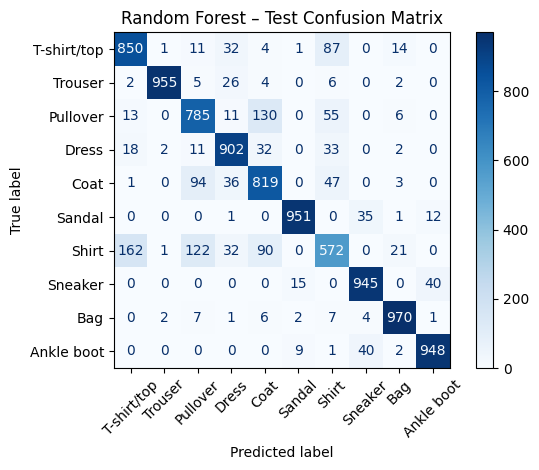

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=class_names
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Random Forest – Test Confusion Matrix")
plt.tight_layout()
plt.show()

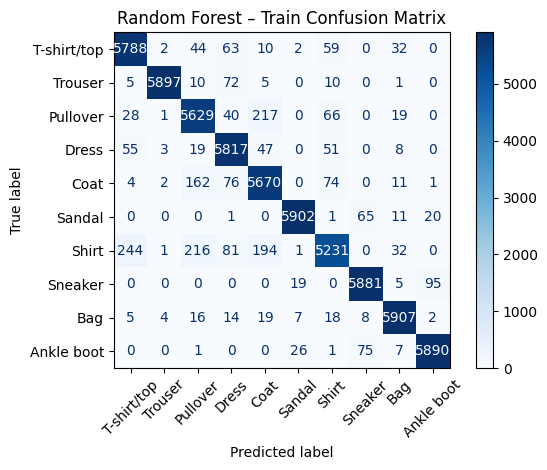

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

cm_test = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=class_names
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Random Forest – Train Confusion Matrix")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_test,
    y_test_pred,
    target_names=class_names,
    output_dict=True
)

df_metrics = pd.DataFrame(report).transpose()
df_metrics[["precision", "recall", "f1-score"]]

,precision,recall,f1-score
T-shirt/top,0.812620,0.8500,0.830890
Trouser,0.993757,0.9550,0.973993
Pullover,0.758454,0.7850,0.771499
Dress,0.866475,0.9020,0.883880
Coat,0.754839,0.8190,0.785612
Sandal,0.972393,0.9510,0.961577
Shirt,0.707921,0.5720,0.632743
Sneaker,0.922852,0.9450,0.933794
Bag,0.950049,0.9700,0.959921
Ankle boot,0.947053,0.9480,0.947526


In [ ]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)